# Code for Cause Assessment

We used the answer key for Homework 5 and modified it to suit our data and models.

In [11]:
# preliminaries 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [12]:
# import data files

exome = pd.read_excel("HC3_js_exomes_2_MG_170307.xlsx")
exomeFiltered = exome.loc[:, ['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]
exomeLoc = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'localization']]
exomeJS = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'js_cause']]
exomeTest = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ]]

variants = exomeTest.values #Change to .values when using answer key method
cause = exomeJS['js_cause'].values #Change to .values when using answer key method

In [13]:
from sklearn.decomposition import PCA

variants_pca = PCA()
variants_pc = variants_pca.fit_transform(variants)

In [14]:
def test_train_id(N, test_frac):
    ntrain = np.floor(N * (1 - test_frac)).astype(int)
    randperm = np.random.permutation(N)
    train = randperm[:ntrain]
    test = randperm[(ntrain-N):]
    return train, test

In [15]:
from sklearn.decomposition import PCA

def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    variants_pca = PCA()
    
    score = np.array([])
    for i in range(reps):
        train, test = test_train_id(y.size, test_frac)
        y_train = y[train]
        y_test = y[test]
        
        X_train = variants_pca.fit_transform(X[train, :])[:, :r]
        X_test = variants_pca.transform(X[test, :])[:, :r]
        
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        this_score = sum(pred == y_test) / len(y_test)
        
        score = np.append(score, this_score)
    return score

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


score = cross_val_class_accuracy(LinearDiscriminantAnalysis(), variants, 
                                cause, 6, 0.2, 100)
print(score.mean())

0.998017621145


In [17]:
#Answer Key Method

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

testfrac = 0.2
reps = 50

lda_r6_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 6,
                                          testfrac, reps)
lda_r2_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 2,
                                          testfrac, reps)
knn6_scores = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2),
                                       variants, cause, 6,
                                        testfrac, reps)
knn2_scores = cross_val_class_accuracy(KNeighborsClassifier(),
                                       variants, cause, 2,
                                        testfrac, reps)
svm6_scores = cross_val_class_accuracy(svm.SVC(),
                                      variants, cause, 6, 
                                     testfrac, reps)
tree6_scores = cross_val_class_accuracy(DecisionTreeClassifier(),
                                       variants, cause, 6,
                                      testfrac, reps)
logistic6_scores = cross_val_class_accuracy(LogisticRegression(),
                                            variants, cause, 6,
                                            testfrac, reps)

In [10]:
print('Check')

Check


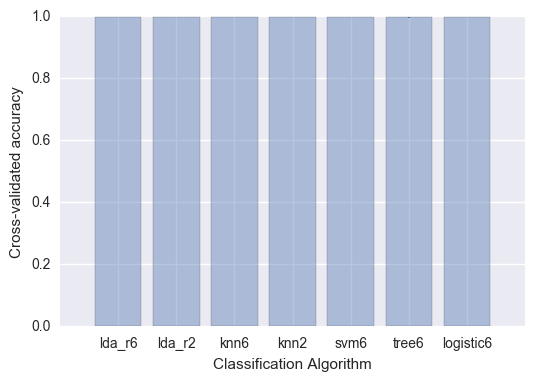

In [22]:
classifiers = ('lda_r6', 'lda_r2', 'knn6', 'knn2', 'svm6', 'tree6', 'logistic6')
scores = [lda_r6_scores.mean(), lda_r2_scores.mean(), 
          knn6_scores.mean(), knn2_scores.mean(),
         svm6_scores.mean(), tree6_scores.mean(),
         logistic6_scores.mean()]
scores_err = [lda_r6_scores.std(), lda_r2_scores.std(), 
          knn6_scores.std(), knn2_scores.std(),
         svm6_scores.std(), tree6_scores.std(),
             logistic6_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha=0.4,)
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')

In [23]:
print('Check')

Check


In [24]:
print(scores)
print(scores_err)

[0.99791483113069024, 0.99833578071463536, 0.99770925110132158, 0.99789525208027396, 0.99807146353401865, 0.99642682329907006, 0.99794419970631421]
[0.00089620951269003043, 0.00077082798570845081, 0.000767338930680966, 0.00078469013910334603, 0.00085572994327949385, 0.0011879257072453741, 0.0009691135522869903]


In [14]:
#Above analysis with all 20 known causative variants and 980 random variants with unknown cause status

In [15]:
exome = pd.read_excel("HC3_1000_js_exomes_2_MG_170307.xlsx")
exomeFiltered = exome.loc[:, ['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]
exomeLoc = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'localization']]
exomeJS = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'js_cause']]
exomeTest = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ]]

variants = exomeTest.values#Change to .values when using answer key method
cause = exomeJS['js_cause'].values #Change to .values when using answer key method

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


score = cross_val_class_accuracy(LinearDiscriminantAnalysis(), variants, 
                                cause, 6, 0.2, 100)
print(score.mean())

0.9791


In [26]:

lda_r6_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 6,
                                          testfrac, reps)
lda_r2_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 2,
                                          testfrac, reps)
knn6_scores = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2),
                                       variants, cause, 6,
                                        testfrac, reps)
knn2_scores = cross_val_class_accuracy(KNeighborsClassifier(),
                                       variants, cause, 2,
                                        testfrac, reps)
svm6_scores = cross_val_class_accuracy(svm.SVC(),
                                      variants, cause, 6, 
                                     testfrac, reps)
tree6_scores = cross_val_class_accuracy(DecisionTreeClassifier(),
                                       variants, cause, 6,
                                      testfrac, reps)
logistic6_scores = cross_val_class_accuracy(LogisticRegression(),
                                            variants, cause, 6,
                                            testfrac, reps)

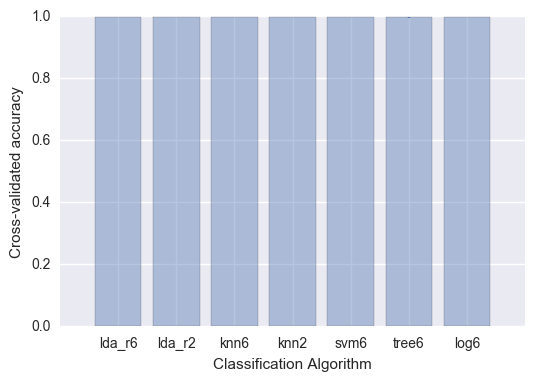

In [25]:
classifiers = ('lda_r6', 'lda_r2', 'knn6', 'knn2', 'svm6', 'tree6', 'log6')
scores = [lda_r6_scores.mean(), lda_r2_scores.mean(), 
          knn6_scores.mean(), knn2_scores.mean(),
         svm6_scores.mean(), tree6_scores.mean(),
         logistic6_scores.mean()]
scores_err = [lda_r6_scores.std(), lda_r2_scores.std(), 
          knn6_scores.std(), knn2_scores.std(),
         svm6_scores.std(), tree6_scores.std(),
             logistic6_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha=0.4,)
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')

In [27]:
print(scores)
print(scores_err)

[0.99791483113069024, 0.99833578071463536, 0.99770925110132158, 0.99789525208027396, 0.99807146353401865, 0.99642682329907006, 0.99794419970631421]
[0.00089620951269003043, 0.00077082798570845081, 0.000767338930680966, 0.00078469013910334603, 0.00085572994327949385, 0.0011879257072453741, 0.0009691135522869903]


In [28]:
# we don't have enought known variants to train our model. The unknown variants are skewing our model

In [29]:
#Above analysis with all 20 known causative variants and 80 random variants with unknown cause status

In [30]:
exome = pd.read_excel("HC3_100_js_exomes_2_MG_170307.xlsx")
exomeFiltered = exome.loc[:, ['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]
exomeLoc = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'localization']]
exomeJS = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'js_cause']]
exomeTest = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ]]

variants = exomeTest.values#Change to .values when using answer key method
cause = exomeJS['js_cause'].values #Change to .values when using answer key method

In [31]:
score = cross_val_class_accuracy(LinearDiscriminantAnalysis(), variants, 
                                cause, 6, 0.2, 100)
print(score.mean())

0.829


In [32]:

lda_r6_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 6,
                                          testfrac, reps)
lda_r2_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          variants, cause, 2,
                                          testfrac, reps)
knn6_scores = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2),
                                       variants, cause, 6,
                                        testfrac, reps)
knn2_scores = cross_val_class_accuracy(KNeighborsClassifier(),
                                       variants, cause, 2,
                                        testfrac, reps)
svm6_scores = cross_val_class_accuracy(svm.SVC(),
                                      variants, cause, 6, 
                                     testfrac, reps)
tree6_scores = cross_val_class_accuracy(DecisionTreeClassifier(),
                                       variants, cause, 6,
                                      testfrac, reps)
logistic6_scores = cross_val_class_accuracy(LogisticRegression(),
                                            variants, cause, 6,
                                            testfrac, reps)

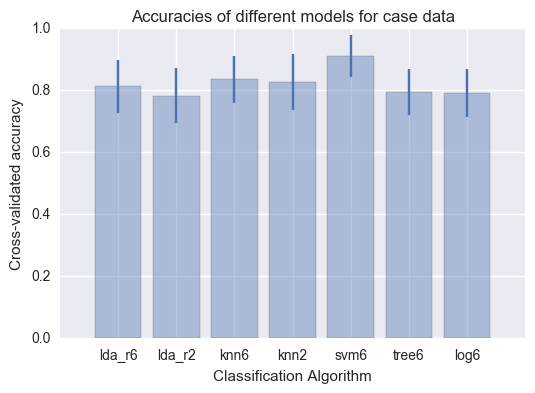

In [36]:
classifiers = ('lda_r6', 'lda_r2', 'knn6', 'knn2', 'svm6', 'tree6', 'log6')
scores = [lda_r6_scores.mean(), lda_r2_scores.mean(), 
          knn6_scores.mean(), knn2_scores.mean(),
         svm6_scores.mean(), tree6_scores.mean(),
         logistic6_scores.mean()]
scores_err = [lda_r6_scores.std(), lda_r2_scores.std(), 
          knn6_scores.std(), knn2_scores.std(),
         svm6_scores.std(), tree6_scores.std(),
             logistic6_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha=0.4,)
plt.title('Accuracies of different models for case data')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')

In [37]:
print(scores)
print(scores_err)

[0.81299999999999994, 0.78300000000000014, 0.83599999999999997, 0.82700000000000007, 0.91000000000000014, 0.79400000000000004, 0.79099999999999993]
[0.085328775919967348, 0.089783071901110623, 0.076183987818963628, 0.088999999999999982, 0.067823299831252681, 0.074592224795886078, 0.077903786814249296]
